# Using Keras and Tensorflow for Deep learning
## Based on examples from Geron textbook

See the examples at this github repo
`https://github.com/ageron/handson-ml/`


This is not a code cell; this is a markdown cell.

Note: In order to get this notebook running in Pycharm, you need to get a Jupyter kernel running that matches your project interpreter.  To do this, you use the following command:
```
source activate myenv
python -m ipykernel install --user --name myenv --display-name "Python (myenv)"
```
Replace `myenv` with your environment's name, keep the ( ) around it for the second instance.




In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
print('tensorflow version:',tf.__version__)

tensorflow version: 2.1.0


In [3]:
print('keras version:',keras.__version__)

keras version: 2.2.4-tf


In [4]:
tf.config.list_physical_devices()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

Num GPUs Available:  1
Num CPUs Available:  1


### Import the data
We are using a logP dataset that has been featurized with RDKit 2D descriptors.  The dataset has target property, Kow, and 200 numerical features.
`smiles` is the chemical identifier.

In [5]:
df = pd.read_csv('../dataFiles/featurized-logP14k.csv')
df.head(10)

,smiles,Kow,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885,1.837692,804.748825,20.698306,16.613088,16.613088,12.963233,10.142335,10.142335,...,0,0,0,0,0,0,0,0,0,0.667213
1,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190,1.654620,786.237565,21.189870,17.571026,17.571026,13.526347,10.837743,10.837743,...,0,0,0,0,0,0,0,0,0,0.700523
2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100,1.664596,827.224695,21.189870,17.454710,17.454710,13.526347,10.684315,10.684315,...,0,0,0,0,0,0,0,0,0,0.728839
3,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470,2.535973,461.783925,12.466255,9.318603,9.318603,8.108226,5.333716,5.333716,...,0,0,0,0,0,0,0,0,1,0.736884
4,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400,1.846855,756.963371,17.386387,13.289420,13.289420,11.340277,7.651541,7.651541,...,0,0,0,0,0,0,0,0,0,0.410670
5,CCC1(CC)C(=O)NC(=O)N(C)C1=O,1.150,3.115228,294.432192,10.930721,8.586172,8.586172,6.491235,4.628120,4.628120,...,0,0,0,0,0,0,0,0,1,0.656908
6,CCC1(c2ccccc2)NC(=O)N(C)C1=O,1.690,2.499092,429.904718,11.759149,9.357568,9.357568,7.615026,5.274019,5.274019,...,0,0,0,0,0,0,0,0,1,0.764131
7,O=P1(N(CCCl)CCCl)NCCCO1,0.630,2.582264,201.866476,10.441311,7.916600,10.322885,6.726492,4.597962,7.244517,...,0,0,0,0,0,0,0,0,0,0.605721
8,CC(O)C(=O)O,-0.720,3.257586,57.058650,5.154701,3.380026,3.380026,2.642734,1.551955,1.551955,...,0,0,0,0,0,0,0,0,0,0.453936
9,CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C(C(=O)CO)CCC12,1.940,1.700111,637.807307,17.982763,15.331880,15.331880,11.808533,9.865486,9.865486,...,0,0,0,0,0,0,0,0,0,0.806020


In [6]:
from core.features import targets_features
# split up the data using 20% for testing
train_features_full, test_features, train_target_full, test_target, feature_list = targets_features(df, 'Kow')

# get validation data from training data
train_features, val_features, train_target, val_target = train_test_split(train_features_full,train_target_full)

### Scale data using sklearn StandardScalar()

In [7]:
# scale feature vectors
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

### Specify the neural network architecture
First let's create a simple neural network using the Keras `Sequential` API.

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=train_features.shape[1:]),
    # keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)  # output layer
])

model.compile(loss = "mean_squared_error", optimizer='rmsprop')
history = model.fit(train_features, train_target, epochs=10,
                    validation_data=(val_features,val_target))
mse_test = model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

Train on 8497 samples, validate on 2833 samples
Epoch 1/10
8497/8497 [==============================] - 2s 242us/sample - loss: 1.4849 - val_loss: 0.6511

Sometimes the model will be unstable in the early epochs and give really bad validation errors.  If this is the case,
try retraining and if it persists, try changing the optmizer and/or its parameters.  A list of optmizers can be found
in the [Keras documentation](https://keras.io/optimizers/ "Keras documentation")


### Visualize the model training

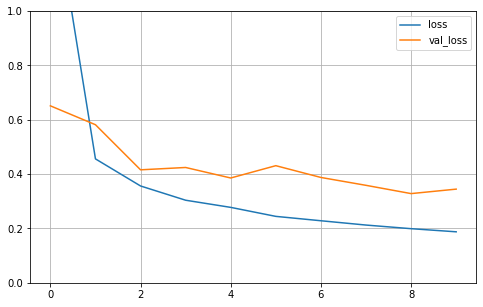

In [9]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


## Building Complex models using the Functional API

The *Functional API* allows for more complex models to be created.  We are going to build a wide and deep model that sends the input layer through the hidden layers as well as directly
to the concat layer.  `https://homl.info/widedeep`  By having two paths through the model, the input data can be
processed by complex rules (long path) as well as simple rules (short path).

In [10]:
# create Input object, specifies shape and dtype
input_ = keras.layers.Input(shape=train_features.shape[1:])

# create first hidden layer that reads from input
hidden1 = keras.layers.Dense(30, activation='relu')(input_)

# create second hidden layer reading from hidden1
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# create Concatenation layer to merge input layer and hidden2
concat = keras.layers.Concatenate()([input_,hidden2])

# output layer with 1 neuron reading from concat
output = keras.layers.Dense(1)(concat)

# create the model and tell it I/O
wd_model = keras.Model(inputs=[input_], outputs=[output])

# compile, specifying exact optmizer so you can change parameters
wd_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [11]:
wd_history = wd_model.fit(train_features, train_target, epochs=10,
                    validation_data=(val_features,val_target))
mse_test = wd_model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

Train on 8497 samples, validate on 2833 samples
Epoch 1/10
8497/8497 [==============================] - 1s 167us/sample - loss: 1.9030 - val_loss: 0.7363

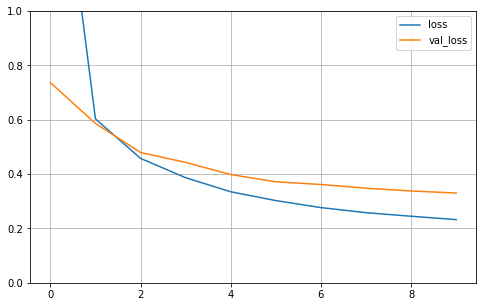

In [12]:
pd.DataFrame(wd_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


## Building Dynamic Models with the Subclassing API

If you want to include dynamic features, such as loops, and variable layers, etc. in your model, you can use the
Subclassing API.  There are several drawbacks, most due to the fact that the model architecture is hidden within a
`call()` method.  This prevents Keras built in quality-of-life features from accessing it.

In [13]:
# subclass the Model class
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs) # handles standard args like name
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)

    def call(self, inputs):
        # input_ = keras.layers.Input(shape=train_features.shape[1:])
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([inputs, hidden2])
        main_output = self.main_output(concat)
        return main_output


In [14]:
wd_2_model = WideAndDeepModel()
inputs = keras.layers.Input(shape=train_features.shape[1:])
wd_2_model.call(inputs)
wd_2_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001))

wd_2_history = wd_2_model.fit(train_features, train_target, epochs=10,
                    validation_data=(val_features,val_target))
mse_test = wd_2_model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

Train on 8497 samples, validate on 2833 samples
Epoch 1/10
8497/8497 [==============================] - 1s 153us/sample - loss: 1.4332 - val_loss: 0.7153

## Saving Models for later use

This is so useful and I never set it up for the sklearn stuff.  Reading this section got me pretty hyped.

Lets use the wide and deep model `wd_model`

In [15]:
wd_model.save('wide_deep_model.h5')  #saves to current dir

reloaded = keras.models.load_model("wide_deep_model.h5")
reload_mse = reloaded.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(reload_mse))

2833/2833 [==============================] - 0s 96us/sample - loss: 0.3097

Test MSE 0.3097


### Using callbacks to save checkpoints

The above method will save the whole model upon completion.  However, for large models we will want to save checkpoint
during the training process.  Additionally, we may want to rollback a model to a previous state.  This is where
callbacks come into play.

You can set callbacks to be saved only when the most recent version of a model performs the best on a validation set.
That way you can train and train, and not worry about over fitting.

In [16]:
# create Input object, specifies shape and dtype
input_ = keras.layers.Input(shape=train_features.shape[1:])

# create first hidden layer that reads from input
hidden1 = keras.layers.Dense(50, activation='relu')(input_)

# create second hidden layer reading from hidden1
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

hidden3 = keras.layers.Dense(10, activation='relu')(hidden2)

# create Concatenation layer to merge input layer and hidden3
concat = keras.layers.Concatenate()([input_,hidden3])

# output layer with 1 neuron reading from concat
output = keras.layers.Dense(1)(concat)

# create the model and tell it I/O
model = keras.Model(inputs=[input_], outputs=[output])

# compile, specifying exact optmizer so you can change parameters
model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001))

# set a checkpoint file to save the model
chkpt_cb = kelras.calbacks.ModelCheckpoint('wd_nn.h5', save_best_only=True)
# set up early stopping callback to avoid wasted resources
stop_cb = keras.callbacks.EarlyStopping(patience=10,  # number of epochs to wait for progress
                                        restore_best_weights=True)

Train on 8497 samples, validate on 2833 samples
Epoch 1/100
8497/8497 [==============================] - 2s 196us/sample - loss: 1.5076 - val_loss: 0.5722

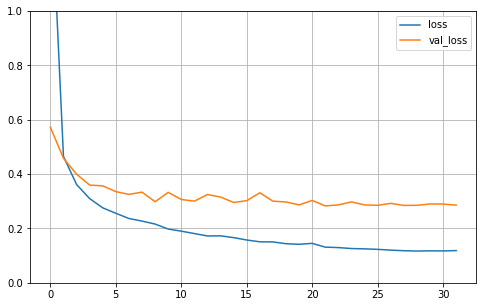

In [17]:
history = model.fit(train_features, train_target, epochs=100,
                    validation_data=(val_features,val_target),
                    callbacks=[chkpt_cb, stop_cb])

mse_test = model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

This is a very great feature.  This will allows us to move through design space with more confidence that we are
using our resources effectively.  The models can be called back at any time to do more training as needed.


## TensorBoard for visualization

Tensorboard is a tool to visualize your neural network training and results (as well as other things).  It reads binary
files called *event files*.  TensorBoard will watch for and monitor these log files and present the data contained
within live.

### Setup the logging functions
We need to set up our program to output these log files and to do so in a way that it creates a new directory for
each model instance we run so that we can compare different runs.

In [18]:
import os

# define the log directory
root_logdir = os.path.join(os.curdir, "mylogs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
print(run_logdir)

# Build and Compile your model
# we are just going to use the one built above


# I think redefining and compiling will reset the weights. 
model = keras.Model(inputs=[input_], outputs=[output])

# compile, specifying exact optmizer so you can change parameters
model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01))

tb_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(train_features, train_target, epochs=100,
                    validation_data=(val_features,val_target),
                    callbacks=[chkpt_cb, stop_cb, tb_cb])

mse_test = model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

.\mylogs\run_2020_04_30-11_21_31
Train on 8497 samples, validate on 2833 samples
Epoch 1/100
8497/8497 [==============================] - 2s 188us/sample - loss: 0.6251 - val_loss: 0.6437

Spin up a TensorBoard server in Jupyter.  It should just pop up in the cell.

**NOTE:**  I had plenty of challenges getting it to find the correct files.  The path specification has all sorts of
issues for windows computers.  By default, TensorBoard will look recursively in the current directory.  You specify
a different directory with `--logdir <my_logs>`  Using `./my_logs` did not work for me, instead use just `my_logs`.
Using a fully specified path such as `C:/your/path/to/files` may also cause problems due to how TB handles `":"`.  See
this [Github issue](https://github.com/tensorflow/tensorboard/issues/52
 "Issue #52") for a workaround.

 Also, it appears tensorboard does not open up in Pycharm's notebook.  It does open in the browswer based notebook or
 at localhost:6006

In [3]:
%load_ext tensorboard

In [20]:
# %tensorboard --inspect --logdir ./my_logs

In [21]:
print(os.path.abspath(os.curdir))
logdir = os.path.abspath(os.curdir) + "\my_logs"
print(logdir)

C:\Users\Adam\OneDrive\Research\McQuade\Projects\NSF\OKN\phase1\Work\scripting\McQuade-Chem-ML\core
C:\Users\Adam\OneDrive\Research\McQuade\Projects\NSF\OKN\phase1\Work\scripting\McQuade-Chem-ML\core\my_logs


In [25]:
# %reload_ext tensorboard
%tensorboard --inspect --logdir my_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stderr:
2020-04-30 11:24:17.645350: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_101.dll
Contents of stdout:
Processing event files... (this can take a few minutes)

Found event files in:
my_logs\run_2020_04_30-09_52_42\train
my_logs\run_2020_04_30-09_52_42\validation
my_logs\run_2020_04_30-09_54_33\train
my_logs\run_2020_04_30-09_54_33\validation
my_logs\run_2020_04_30-09_55_25\train
my_logs\run_2020_04_30-09_55_25\validation
my_logs\run_2020_04_30-09_55_56\train
my_logs\run_2020_04_30-09_55_56\validation
my_logs\run_2020_04_30-10_08_45\train
my_logs\run_2020_04_30-10_08_45\validation
my_logs\run_2020_04_30-10_28_59\train
my_logs\run_2020_04_30-10_28_59\validation

These tags are in my_logs\run_2020_04_30-09_52_42\train:
audio -
histograms -
images -
scalars
   epoch_loss
tensor
   batch_2
   keras

Event statistics for my_logs\run_2020_04_30-09_52_42\train:

In [4]:
%tensorboard --logdir my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 25588.

In [23]:
# %tensorboard --logdir ./

## Optimizing Keras Neural Network Models

I believe you can wrap up Keras models to look like Scikit-learn models and then use sklearn procedures on them.
However, `RandomCV` and `GridSearchCV` are not ideal.  The text book lists several packages for doing smarter
optimization algorithms, including skopt, which we use for our sklearn models.  That will be my first attempt, I think.
Then I will try ones made specifically for Keras/TF.

Using skopt for all models would be preferred just for consistency sake and keeping the procedures simpler.
